### <html><div align='center'> CrymeClassifiers Hyperparameter Tuning </div></html>

In [291]:
from datetime import datetime, timedelta
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
from utils import assign_coordinate_to_lon_box, assign_coordinate_to_lat_box

In [234]:
ts_start = str(datetime(year=2018, month=4, day=30))
ts_end = str(datetime(year=2019, month=4, day=1))

In [235]:
data = pd.read_csv('/home/ben/.envs/cc/CrymeClarity/crymepipelines/src/tmp/complete_dataset.csv')

train_ds = data[(data.timestamp > ts_start) & (data.timestamp < ts_end)]
test_ds = data[(data.timestamp > ts_end)]

features = ['longitude', 'latitude', 'time_minutes']
    

##### Assault / Battery CC

In [40]:
target = 'n_ab'
lls = []
max_depths = []
for i in range(1, 20):
    rfc = RandomForestClassifier(max_depth=i, n_estimators=100, n_jobs=-1)
    rfc.fit(train_ds[features], train_ds[target])
    y_est = rfc.predict_proba(test_ds[features])
    lls.append(log_loss(test_ds[target], y_est))
    max_depths.append(i)

Text(0, 0.5, 'Log Loss')

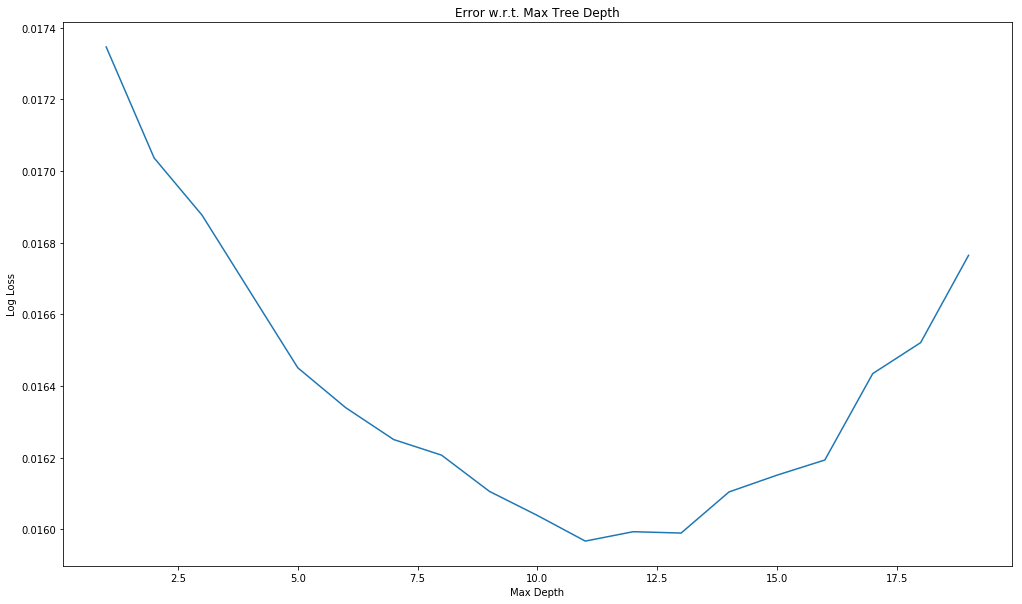

In [41]:
plt.figure(figsize=(17,10))
plt.plot(max_depths, lls)
plt.title('Error w.r.t. Max Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Log Loss')

In [ ]:
target = 'n_ab'
lls = []
n_estimators = []
for i in range(1, 100, 10):
    print(i)
    rfc = RandomForestClassifier(max_depth=10, n_estimators=i, n_jobs=-1)
    rfc.fit(train_ds[features], train_ds[target])
    y_est = rfc.predict_proba(test_ds[features])
    lls.append(log_loss(test_ds[target], y_est))
    n_estimators.append(i)

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(n_estimators, lls)
plt.title('Error w.r.t. Num. Estimators')
plt.xlabel('N Trees')
plt.ylabel('Log Loss')

In [ ]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=-1, criterion='gini')
rfc.fit(train_ds[features], train_ds[target])
y_est = rfc.predict_proba(test_ds[features])
print('gini: ', log_loss(test_ds[target], y_est))
rfc = RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=-1, criterion='entropy')
rfc.fit(train_ds[features], train_ds[target])
y_est = rfc.predict_proba(test_ds[features])
print('entropy: ', log_loss(test_ds[target], y_est))


In [ ]:
target = 'n_ab'
lls = []
n_estimators = []
for i in range(2, 10):
    print(i)
    rfc = RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=-1, criterion='entropy', min_samples_split=i)
    rfc.fit(train_ds[features], train_ds[target])
    y_est = rfc.predict_proba(test_ds[features])
    lls.append(log_loss(test_ds[target], y_est))
    n_estimators.append(i)

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(n_estimators, lls)
plt.title('Error w.r.t. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Log Loss')

In [ ]:
target = 'n_ab'
lls = []
n_estimators = []
for i in range(1, 10):
    print(i)
    rfc = RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=-1, criterion='entropy', min_samples_leaf=i)
    rfc.fit(train_ds[features], train_ds[target])
    y_est = rfc.predict_proba(test_ds[features])
    lls.append(log_loss(test_ds[target], y_est))
    n_estimators.append(i)

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(n_estimators, lls)
plt.title('Error w.r.t. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Log Loss')

In [ ]:
ab_params = {
    'n_estimators': 30,
    'max_depth': 10,
    'criterion': 'entropy'
}

#### Buglary / Theft CC

In [ ]:
target = 'n_bt'
lls = []
max_depths = []
for i in range(1, 20):
    rfc = RandomForestClassifier(max_depth=i, n_estimators=10, n_jobs=-1)
    rfc.fit(train_ds[features], train_ds[target])
    y_est = rfc.predict_proba(test_ds[features])
    lls.append(log_loss(test_ds[target], y_est))
    max_depths.append(i)

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(max_depths, lls)
plt.title('Error w.r.t. Max Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Log Loss')

In [ ]:
target = 'n_bt'
lls = []
n_estimators = []
for i in range(1, 100, 10):
    print(i)
    rfc = RandomForestClassifier(max_depth=8, n_estimators=i, n_jobs=-1)
    rfc.fit(train_ds[features], train_ds[target])
    y_est = rfc.predict_proba(test_ds[features])
    lls.append(log_loss(test_ds[target], y_est))
    n_estimators.append(i)

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(n_estimators, lls)
plt.title('Error w.r.t. Num. Estimators')
plt.xlabel('N Trees')
plt.ylabel('Log Loss')

In [ ]:
rfc = RandomForestClassifier(max_depth=12, n_estimators=30, n_jobs=-1, criterion='gini')
rfc.fit(train_ds[features], train_ds[target])
y_est = rfc.predict_proba(test_ds[features])
print('gini: ', log_loss(test_ds[target], y_est))
rfc = RandomForestClassifier(max_depth=12, n_estimators=30, n_jobs=-1, criterion='entropy')
rfc.fit(train_ds[features], train_ds[target])
y_est = rfc.predict_proba(test_ds[features])
print('entropy: ', log_loss(test_ds[target], y_est))


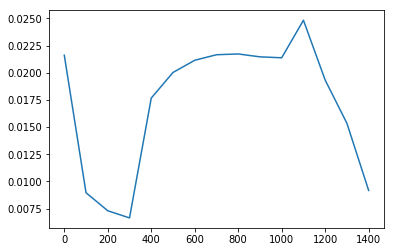

In [53]:
target = 'n_bt'
rfc = RandomForestClassifier(max_depth=11, n_estimators=100, n_jobs=-1, criterion='entropy')
rfc.fit(train_ds[features], train_ds[target])

tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.054416, -118.253341, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)

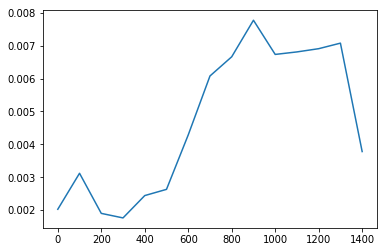

In [55]:
target = 'n_r'
rfc = RandomForestClassifier(max_depth=11, n_estimators=100, n_jobs=-1, criterion='entropy')
rfc.fit(train_ds[features], train_ds[target])

tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.054416, -118.253341, i]])[0][1])

plt.plot(range(0, 1440, 100), tst)

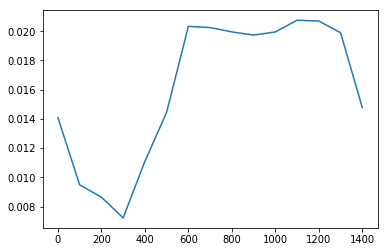

In [242]:
target = 'n_ab'
rfc = RandomForestClassifier(max_depth=11, n_estimators=200, n_jobs=-1, criterion='entropy')
rfc.fit(train_ds[features], train_ds[target])

tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.054416, -118.253341, i]])[0][1])

plt.plot(range(0, 1440, 100), tst)

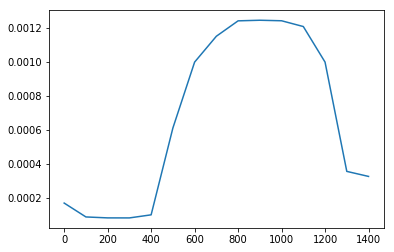

In [256]:
target = 'n_sp'
rfc = RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=-1, criterion='entropy')
rfc.fit(train_ds[features], train_ds[target])

tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.040402, -118.426593, i]])[0][1])

plt.plot(range(0, 1440, 100), tst)

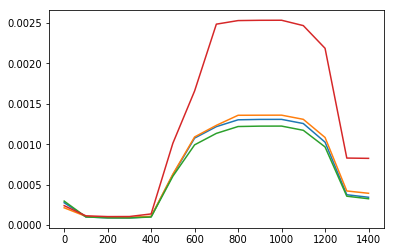

In [257]:
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)

In [258]:
lons = np.linspace(34.101287,33.995286, 200)
lats = np.linspace(-118.454942, -118.342848, 200)


In [287]:
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 500])
    grid.append(row)
        

In [288]:
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    

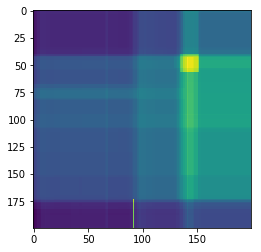

In [268]:
import numpy as np
plt.imshow(np.array(im), interpolation='none')
plt.show()

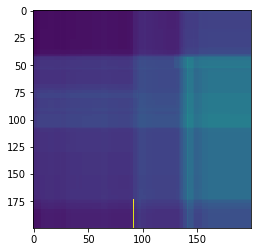

In [289]:
import numpy as np
plt.imshow(np.array(im), interpolation='none')
plt.show()

In [282]:
grid[55][165]

[34.07199024120603, -118.36199973869347, 800]

In [300]:
assign_coordinate_to_lon_box(34.074519)

4697

In [299]:
assign_coordinate_to_lat_box(-118.376421)

27128

In [303]:
hm = data[(data.lon_bb==4697)&(data.lat_bb==27128)]

In [302]:
hm[hm['n_sp']>0]

,id,latitude,longitude,timestamp,lat_bb,lon_bb,timestamp_unix,n_ab,n_b,n_t,n_btv,n_vbbs,n_pdt,n_ltvc,n_sp,n_mio,n_r,time_minutes,day_of_week
284887,2657447,-118.373903,34.075282,2019-03-08 13:30:18,27128,4697,1552080618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,810,4
366510,2019373,-118.372744,34.072913,2018-11-01 14:40:31,27128,4697,1541108431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,880,3
454387,2490710,-118.373071,34.076485,2019-02-02 17:43:36,27128,4697,1549158216,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1063,5
455731,2742964,-118.374239,34.074094,2019-03-26 11:25:53,27128,4697,1553624753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,685,1
493236,2560552,-118.375623,34.074423,2019-02-17 11:05:05,27128,4697,1550430305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,665,6
618249,2762103,-118.375456,34.078395,2019-03-29 15:39:34,27128,4697,1553899174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,939,4
710224,2099946,-118.375018,34.078556,2018-11-17 14:22:20,27128,4697,1542493340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,862,5
711381,2334617,-118.372629,34.073415,2019-01-03 10:55:33,27128,4697,1546541733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,655,3
844420,2260192,-118.375963,34.077209,2018-12-19 15:36:19,27128,4697,1545262579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,936,2
928132,1849620,-118.375188,34.074746,2018-09-28 14:38:02,27128,4697,1538170682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,878,4
